# 10th July

# 11th July

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
plt.style.use('ggplot')

In [2]:
mtcars=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\mtcars.csv')
print(mtcars.head())


    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


In [3]:
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

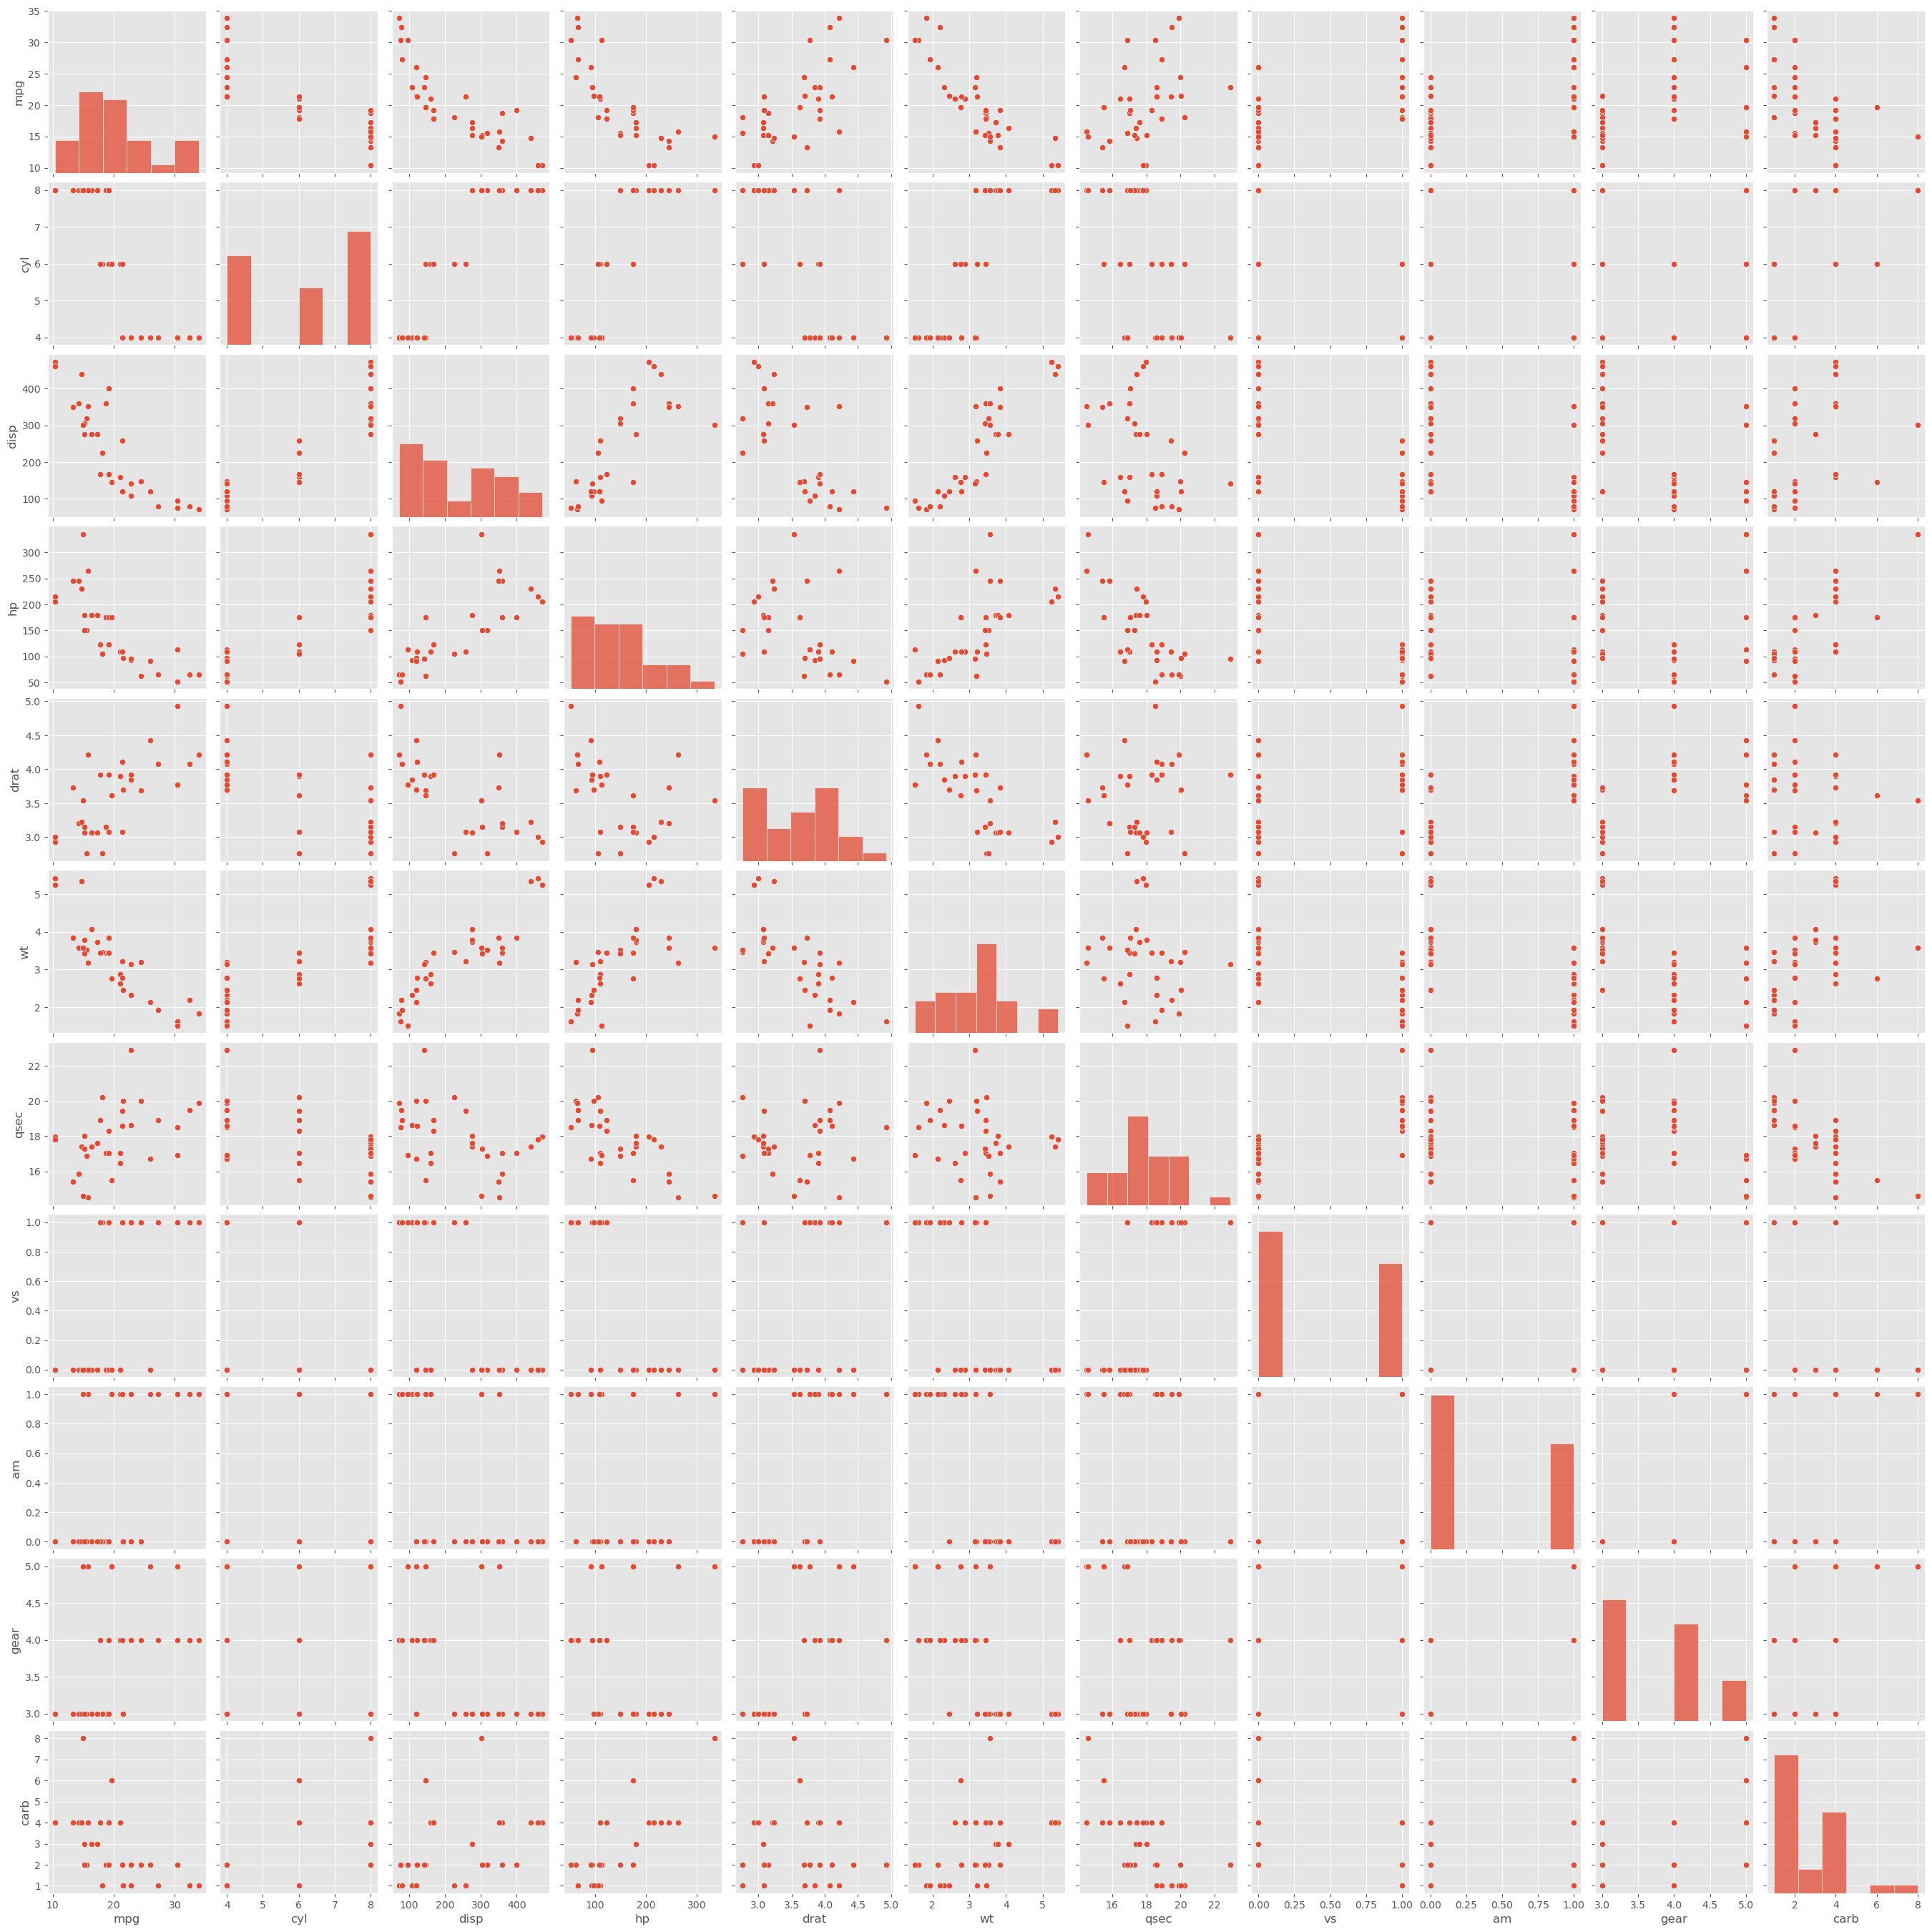

In [4]:
import seaborn as sns
sns.pairplot(mtcars)

In [5]:
mtcars[['mpg','wt']].describe()

,mpg,wt
count,32.000000,32.000000
mean,20.090625,3.217250
std,6.026948,0.978457
min,10.400000,1.513000
25%,15.425000,2.581250
50%,19.200000,3.325000
75%,22.800000,3.610000
max,33.900000,5.424000


# Model Fitting

In [6]:
y=mtcars['mpg']
x=mtcars['wt']
x=sm.add_constant(x)
print(x)

    const     wt
0     1.0  2.620
1     1.0  2.875
2     1.0  2.320
3     1.0  3.215
4     1.0  3.440
5     1.0  3.460
6     1.0  3.570
7     1.0  3.190
8     1.0  3.150
9     1.0  3.440
10    1.0  3.440
11    1.0  4.070
12    1.0  3.730
13    1.0  3.780
14    1.0  5.250
15    1.0  5.424
16    1.0  5.345
17    1.0  2.200
18    1.0  1.615
19    1.0  1.835
20    1.0  2.465
21    1.0  3.520
22    1.0  3.435
23    1.0  3.840
24    1.0  3.845
25    1.0  1.935
26    1.0  2.140
27    1.0  1.513
28    1.0  3.170
29    1.0  2.770
30    1.0  3.570
31    1.0  2.780


In [7]:
y.shape,x.shape


((32,), (32, 2))

In [8]:
model_sm=sm.OLS(y,x).fit()
print(model_sm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.745   
Dependent Variable: mpg              AIC:                164.0294
Date:               2024-07-18 09:58 BIC:                166.9609
No. Observations:   32               Log-Likelihood:     -80.015 
Df Model:           1                F-statistic:        91.38   
Df Residuals:       30               Prob (F-statistic): 1.29e-10
R-squared:          0.753            Scale:              9.2774  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     37.2851     1.8776   19.8576   0.0000   33.4505   41.1198
wt        -5.3445     0.5591   -9.5590   0.0000   -6.4863   -4.2026
-----------------------------------------------------------------
Omnibus:              2.988        Durbin-Watson:           1.252
Prob(Omnibus):   

In [9]:
model_sm.rsquared

0.7528327936582646

# Fitting model using scikit-Learn

In [10]:
from sklearn import linear_model
regression_model=linear_model.LinearRegression()
regression_model.fit(X=pd.DataFrame(mtcars['wt']),y=y)
print(regression_model.intercept_)
print(regression_model.coef_)
regression_model.score(X=pd.DataFrame(mtcars['wt']),y=mtcars['mpg'])



37.28512616734204
[-5.34447157]


0.7528327936582646

In [11]:
pred=regression_model.predict(X=[[3.5],[4],[5],[6]])
print(pred)

[18.57947566 15.90723988 10.5627683   5.21829673]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
train_prediction=regression_model.predict(X=pd.DataFrame(mtcars['wt']))
print(train_prediction)

[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


In [13]:
mtcars_WM=mtcars[['wt','mpg']]
mtcars_WM.head()

,wt,mpg
0,2.620,21.0
1,2.875,21.0
2,2.320,22.8
3,3.215,21.4
4,3.440,18.7


In [14]:
import pandas as pd

# Assuming mtcars_WM is your DataFrame and train_prediction is your predictions
# Create a DataFrame from train_prediction if it's not already a DataFrame
train_prediction_df = pd.DataFrame(train_prediction)

# Use .loc to assign values to a new column 'predicted MPG' in mtcars_WM
mtcars_WM.loc[:, 'predicted MPG'] = train_prediction_df


C:\Users\DELL\AppData\Local\Temp\ipykernel_6184\3737430952.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtcars_WM.loc[:, 'predicted MPG'] = train_prediction_df


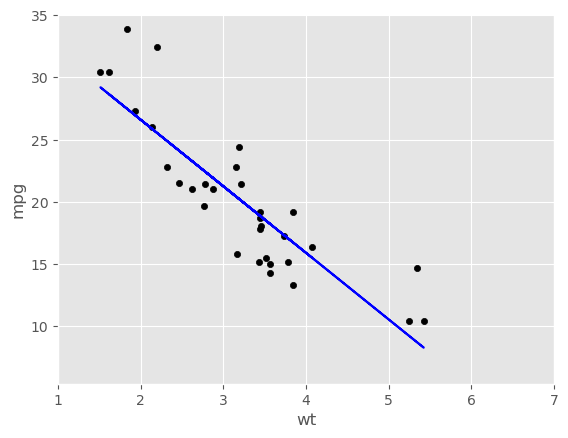

In [15]:
mtcars.plot(kind='scatter',x='wt',y='mpg',color='black',xlim=(1,7),ylim=(5.40))
plt.plot(mtcars['wt'],train_prediction,color='blue');

In [16]:
error_sm=model_sm.resid
error_sm


0    -2.282611
1    -0.919770
2    -2.085952
3     1.297350
4    -0.200144
5    -0.693255
6    -3.905363
7     4.163738
8     2.349959
9     0.299856
10   -1.100144
11    0.866873
12   -0.050247
13   -1.883024
14    1.173350
15    2.103288
16    5.981074
17    6.872711
18    1.746195
19    6.421979
20   -2.611004
21   -2.972586
22   -3.726866
23   -3.462355
24    2.464367
25    0.356426
26    0.152043
27    1.201059
28   -4.543151
29   -2.780940
30   -3.205363
31   -1.027495
dtype: float64

In [17]:
residuals=y-train_prediction
data=pd.DataFrame({'actual_y':y,
                  'predicted_y':train_prediction,
                  'error1':error_sm,
                  'error2':residuals})
print(data)

    actual_y  predicted_y    error1    error2
0       21.0    23.282611 -2.282611 -2.282611
1       21.0    21.919770 -0.919770 -0.919770
2       22.8    24.885952 -2.085952 -2.085952
3       21.4    20.102650  1.297350  1.297350
4       18.7    18.900144 -0.200144 -0.200144
5       18.1    18.793255 -0.693255 -0.693255
6       14.3    18.205363 -3.905363 -3.905363
7       24.4    20.236262  4.163738  4.163738
8       22.8    20.450041  2.349959  2.349959
9       19.2    18.900144  0.299856  0.299856
10      17.8    18.900144 -1.100144 -1.100144
11      16.4    15.533127  0.866873  0.866873
12      17.3    17.350247 -0.050247 -0.050247
13      15.2    17.083024 -1.883024 -1.883024
14      10.4     9.226650  1.173350  1.173350
15      10.4     8.296712  2.103288  2.103288
16      14.7     8.718926  5.981074  5.981074
17      32.4    25.527289  6.872711  6.872711
18      30.4    28.653805  1.746195  1.746195
19      33.9    27.478021  6.421979  6.421979
20      21.5    24.111004 -2.61100

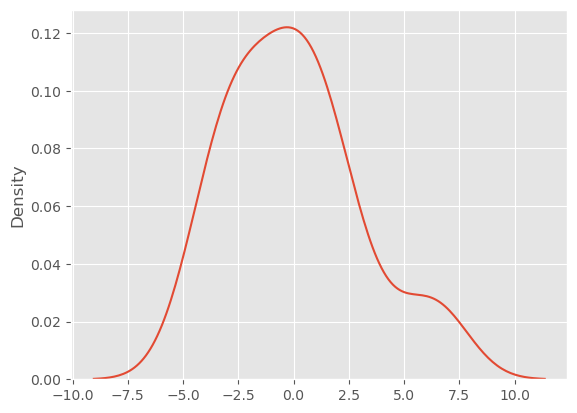

In [18]:
sns.kdeplot(error_sm)
plt.show() 

In [19]:
poly_model=linear_model.LinearRegression()
predictors_X=pd.DataFrame([mtcars['wt'],
                          mtcars['wt']**2,
                           mtcars['wt']**3,
                           mtcars['wt']**4,
                           mtcars['wt']**5,
                           mtcars['wt']**6,
                          ]).T
poly_model.fit(X=predictors_X,y=y)
print('Model intercept:',poly_model.intercept_)
print('Model coeffecients:',poly_model.coef_)
print('Model Accuracy:',poly_model.score(X=predictors_X,y=mtcars['mpg']))


Model intercept: -580.1180291199187
Model coeffecients: [ 1.25251793e+03 -1.01544961e+03  4.19153811e+02 -9.38894251e+01
  1.08661013e+01 -5.09042883e-01]
Model Accuracy: 0.832248246559977


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


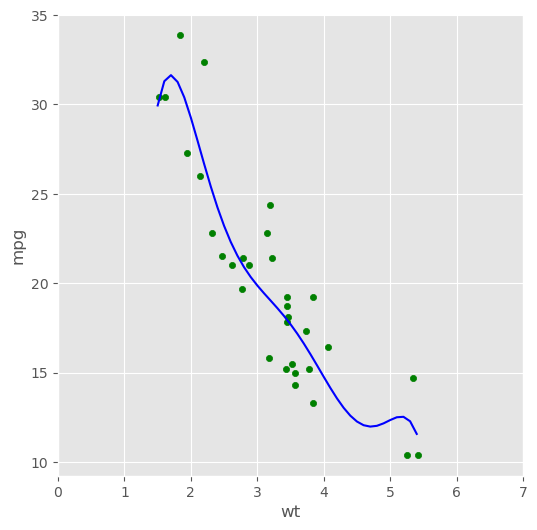

In [20]:
poly_line_range=np.arange(1.5,5.5,0.1)
poly_predictors=pd.DataFrame([poly_line_range,
                              poly_line_range**2,
                              poly_line_range**3,
                              poly_line_range**4,
                              poly_line_range**5,
                              poly_line_range**6,
                          ]).T
y_values=poly_model.predict(X=poly_predictors)
mtcars.plot(kind='scatter',x='wt',y='mpg',figsize=(6,6),color='Green',xlim=(0,7))
plt.plot(poly_line_range,
        y_values,
        color='blue');

# 15th July

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

# Fitting MLR Model

In [22]:
mtcars=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\mtcars.csv')
print(mtcars.columns)
X_features=mtcars.drop(['mpg'],axis=1)
X_features.head()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [23]:
X_features.shape

(32, 10)

In [24]:
X_features.dtypes

cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [25]:
# add constant intercept term 1 to dataset
X=sm.add_constant(X_features)
print(X.head())
y=mtcars['mpg']
print(y.shape)

   const  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0    1.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1    1.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2    1.0    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3    1.0    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4    1.0    8  360.0  175  3.15  3.440  17.02   0   0     3     2
(32,)


In [26]:
X=sm.add_constant(X_features)
#print(X.head())
y=mtcars['mpg']
print(y.head())

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


In [27]:
# split the data into train and test 
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=1000)
print(len(mtcars))
print(train_X.shape,test_X.shape)
print(train_y.shape,test_y.shape)

32
(25, 11) (7, 11)
(25,) (7,)


In [28]:
# Fit the regression model
mlr_model=sm.OLS(train_y, train_X).fit()
mlr_model.rsquared


0.8455176781749856

In [29]:
# checking the summary of model
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.735   
Dependent Variable: mpg              AIC:                135.2681
Date:               2024-07-18 09:58 BIC:                148.6757
No. Observations:   25               Log-Likelihood:     -56.634 
Df Model:           10               F-statistic:        7.663   
Df Residuals:       14               Prob (F-statistic): 0.000389
R-squared:          0.846            Scale:              9.7052  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    26.0093    27.4612    0.9471   0.3596   -32.8891   84.9077
cyl      -1.1395     1.7556   -0.6490   0.5268    -4.9049    2.6260
disp      0.0130     0.0262    0.4963   0.6274    -0.0431    0.0691
hp       -0.0070     0.0309   -0.2270   0.8237    -0.0733    0.0593
drat      0.7325     2.4505    0.2989   0.7694    -4.5233    5.9883
wt       -4.2988     3.0471   -1.4108   0.1801   -10.8342    2.2366
qsec      0.6756     0.9248    0.7306   0.4771    -1.3079    2.6592
vs       -0.6084     4.0222   -0.1513   0.8819    -9.2352    8.0184
am        1.3226     3.1718    0.4170   0.6830    -5.4803    8.1254
gear     -0.3524     2.8079   -0.1255   0.9019    -6.3748    5.6701
carb     -0.1423     1.3238   -0.1075   0.9159    -2.9816    2.6969
-----------------------------------------------------------------
Omnibus:              1.304        Durbin-Watson:           2.637
Prob(Omnibus):        0.521        Jarque-Bera (JB):        1.147
Skew:                 0.360        Prob(JB):                0.563
Kurtosis:             2.236        Condition No.:           14262
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [30]:
corr=X_features.corr()
print(corr)

           cyl      disp        hp      drat        wt      qsec        vs  \
cyl   1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242 -0.810812   
disp  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698 -0.710416   
hp    0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223 -0.723097   
drat -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205  0.440278   
wt    0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716 -0.554916   
qsec -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000  0.744535   
vs   -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535  1.000000   
am   -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861  0.168345   
gear -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682  0.206023   
carb  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249 -0.569607   

            am      gear      carb  
cyl  -0.522607 -0.492687  0.526988  
disp -0.591227 -0.555569  0.394977  
hp   -0.243204 -0.125704  0.74

# Checking for MultiCollinearity

<Axes: >

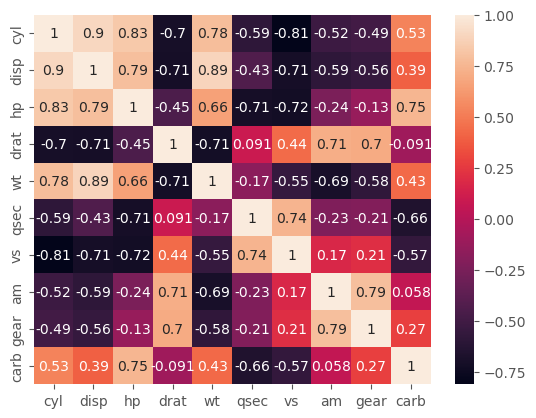

In [31]:
corr=X_features.corr()
sns.heatmap(corr,annot=True)

In [32]:
X.shape[1]

11

In [33]:
# VIF calculator for features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif['Variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return(vif)

In [34]:
calc_vif(X)

,Variables,VIF
0,const,1596.273030
1,cyl,15.373833
2,disp,21.620241
3,hp,9.832037
4,drat,3.374620
5,wt,15.164887
6,qsec,7.527958
7,vs,4.965873
8,am,4.648487
9,gear,5.357452


# Choosing <10 VIF values feature

In [35]:
X_new=X.drop(['cyl','disp','hp'],axis=1)
X_new
#X_new.shape

,const,drat,wt,qsec,vs,am,gear,carb
0,1.0,3.90,2.620,16.46,0,1,4,4
1,1.0,3.90,2.875,17.02,0,1,4,4
2,1.0,3.85,2.320,18.61,1,1,4,1
3,1.0,3.08,3.215,19.44,1,0,3,1
4,1.0,3.15,3.440,17.02,0,0,3,2
5,1.0,2.76,3.460,20.22,1,0,3,1
6,1.0,3.21,3.570,15.84,0,0,3,4
7,1.0,3.69,3.190,20.00,1,0,4,2
8,1.0,3.92,3.150,22.90,1,0,4,2
9,1.0,3.92,3.440,18.30,1,0,4,4


In [36]:
calc_vif(X_new)

,Variables,VIF
0,const,555.181078
1,drat,3.043073
2,wt,5.104823
3,qsec,4.139107
4,vs,4.191818
5,am,4.258479
6,gear,4.688164
7,carb,3.826243


In [37]:
mlr_model_2=sm.OLS(y,X_new).fit()
print('MLR_model:',mlr_model.rsquared)
print('MLR_model:',mlr_model.rsquared_adj)
print('MLR_MODEL_2:',mlr_model_2.rsquared)
print('MLR_MODEL_2:',mlr_model_2.rsquared_adj)


MLR_model: 0.8455176781749856
MLR_model: 0.7351731625856897
MLR_MODEL_2: 0.8622515069014454
MLR_MODEL_2: 0.8220748630810336


In [38]:
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     21.46
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           6.99e-09
Time:                        09:58:19   Log-Likelihood:                -70.661
No. Observations:                  32   AIC:                             157.3
Df Residuals:                      24   BIC:                             169.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4612     10.589      0.799      0.432     -13.394      30.316
drat           1.0565      1.490      0.709      0.485      -2.018       4.131
wt            -2.9502      1.054     -2.798      0.010      -5.126      -0.774
qsec           0.8955      0.520      1.723      0.098      -0.177       1.968
vs            -0.1033      1.855     -0.056      0.956      -3.931       3.725
am             2.5377      1.888      1.344      0.192      -1.360       6.435
gear           0.6730      1.340      0.502      0.620      -2.093       3.439
carb          -0.7573      0.553     -1.370      0.183      -1.899       0.384
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.766
Skew:                           0.252   Prob(JB):                        0.682
Kurtosis:                       2.434   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual Analysis

In [39]:
mlr_model_2.resid

0    -0.792474
1    -0.541662
2    -3.918730
3     0.602575
4     1.313567
5    -2.335050
6    -0.194947
7     2.467188
8    -2.090773
9     0.798752
10   -1.138550
11    1.373731
12    1.091573
13   -1.219120
14   -0.759222
15   -0.176566
16    4.005579
17    4.314123
18    1.298314
19    4.204335
20   -2.675514
21   -1.104062
22   -2.451925
23   -0.562710
24    3.055476
25   -1.057235
26   -0.171095
27    3.000621
28   -3.625790
29    0.347190
30    0.412457
31   -3.470056
dtype: float64

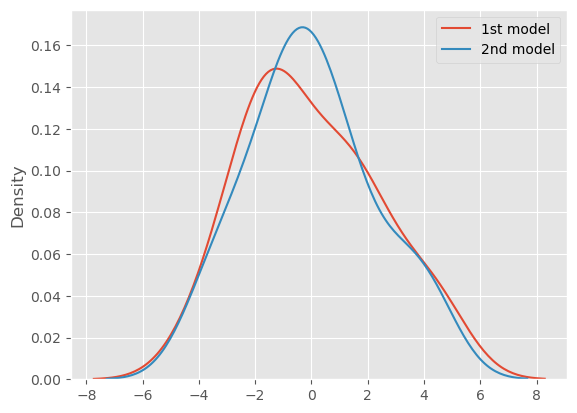

In [40]:
Residual1=mlr_model.resid
Residual2=mlr_model_2.resid
sns.kdeplot(Residual1,label='1st model')
sns.kdeplot(Residual2,label='2nd model')
plt.legend()
plt.show()

# 16th July

# QQ Plot

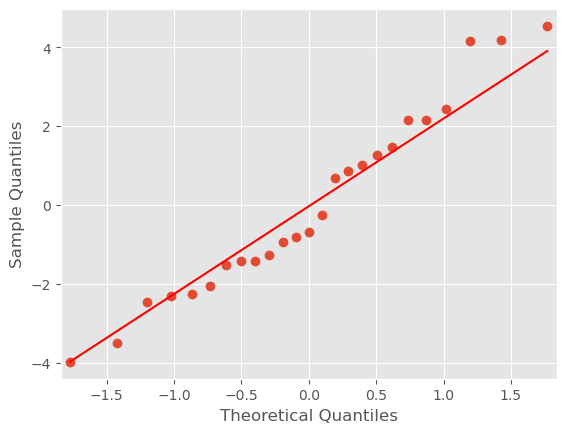

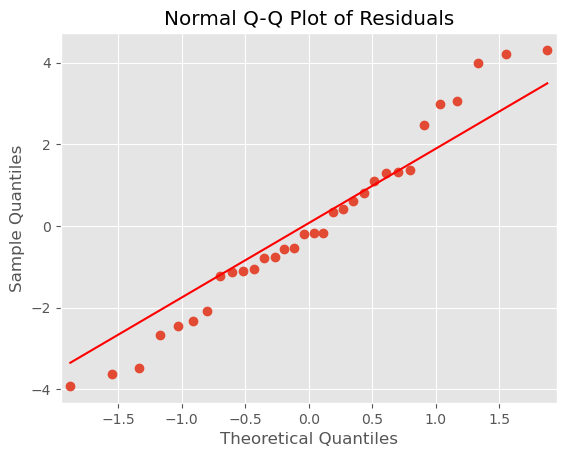

In [41]:
qqplot=sm.qqplot(Residual1,line='q')
qqplot=sm.qqplot(Residual2,line='q')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

# PP Plot

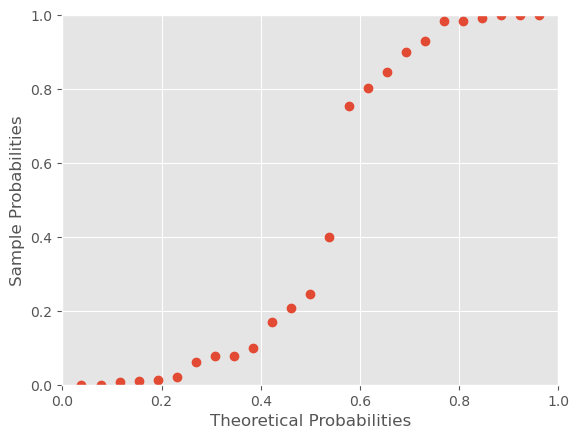

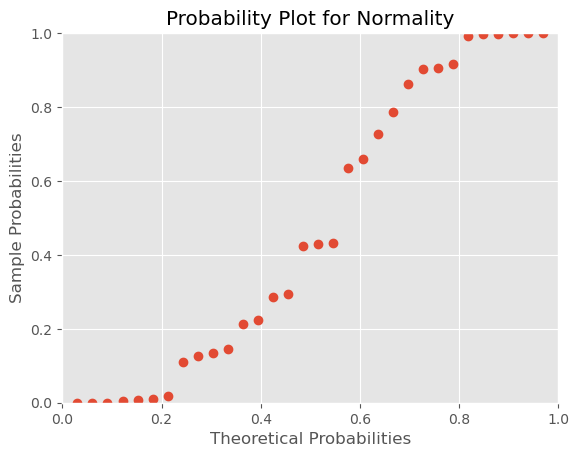

In [42]:
pplot=sm.ProbPlot(Residual1)
pplot1=sm.ProbPlot(Residual2)
fig=pplot.ppplot()
fig=pplot1.ppplot()
plt.title('Probability Plot for Normality')
plt.show()
                


# Residual Plot

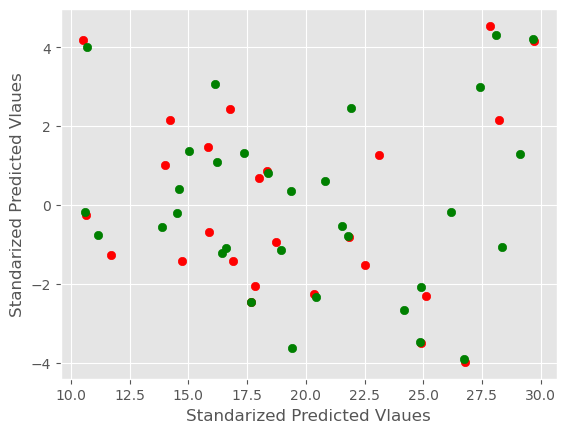

In [43]:
plt.scatter(mlr_model.fittedvalues,mlr_model.resid,c='r')
plt.scatter(mlr_model_2.fittedvalues,mlr_model_2.resid,c='g')
plt.xlabel('Standarized Predicted Vlaues')
plt.ylabel('Standarized Predicted Vlaues')
plt.show()

# Data Transformation

In [44]:
# Transformation of data via standarization method
def standarized_values(vals):
    return (vals-vals.mean())/vals.std()

In [45]:
X_standr=standarized_values(X_new)
print(X_standr)

    const      drat        wt      qsec        vs        am      gear  \
0     NaN  0.567514 -0.610400 -0.777165 -0.868028  1.189901  0.423554   
1     NaN  0.567514 -0.349785 -0.463781 -0.868028  1.189901  0.423554   
2     NaN  0.474000 -0.917005  0.426007  1.116036  1.189901  0.423554   
3     NaN -0.966118 -0.002300  0.890487  1.116036 -0.814143 -0.931819   
4     NaN -0.835198  0.227654 -0.463781 -0.868028 -0.814143 -0.931819   
5     NaN -1.564608  0.248095  1.326987  1.116036 -0.814143 -0.931819   
6     NaN -0.722981  0.360516 -1.124126 -0.868028 -0.814143 -0.931819   
7     NaN  0.174754 -0.027850  1.203871  1.116036 -0.814143  0.423554   
8     NaN  0.604919 -0.068731  2.826755  1.116036 -0.814143  0.423554   
9     NaN  0.604919  0.227654  0.252526  1.116036 -0.814143  0.423554   
10    NaN  0.604919  0.227654  0.588295  1.116036 -0.814143  0.423554   
11    NaN -0.984820  0.871525 -0.251127 -0.868028 -0.814143 -0.931819   
12    NaN -0.984820  0.524039 -0.139204 -0.868028 -

In [46]:
X_standr.describe()

,const,drat,wt,qsec,vs,am,gear,carb
count,0.0,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,NaN,-2.775558e-16,-3.608225e-16,-1.443290e-15,0.000000,5.551115e-17,-2.775558e-17,2.775558e-17
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,NaN,-1.564608e+00,-1.741772e+00,-1.874010e+00,-0.868028,-8.141431e-01,-9.318192e-01,-1.122152e+00
25%,NaN,-9.661175e-01,-6.500027e-01,-5.351317e-01,-0.868028,-8.141431e-01,-9.318192e-01,-5.030337e-01
50%,NaN,1.841059e-01,1.101223e-01,-7.764656e-02,-0.868028,-8.141431e-01,4.235542e-01,-5.030337e-01
75%,NaN,6.049193e-01,4.013971e-01,5.882951e-01,1.116036,1.189901e+00,4.235542e-01,7.352031e-01
max,NaN,2.493904e+00,2.255336e+00,2.826755e+00,1.116036,1.189901e+00,1.778928e+00,3.211677e+00


In [47]:
X_standr=X_standr.drop(['const'],axis=1)

In [48]:
print(X_standr)

        drat        wt      qsec        vs        am      gear      carb
0   0.567514 -0.610400 -0.777165 -0.868028  1.189901  0.423554  0.735203
1   0.567514 -0.349785 -0.463781 -0.868028  1.189901  0.423554  0.735203
2   0.474000 -0.917005  0.426007  1.116036  1.189901  0.423554 -1.122152
3  -0.966118 -0.002300  0.890487  1.116036 -0.814143 -0.931819 -1.122152
4  -0.835198  0.227654 -0.463781 -0.868028 -0.814143 -0.931819 -0.503034
5  -1.564608  0.248095  1.326987  1.116036 -0.814143 -0.931819 -1.122152
6  -0.722981  0.360516 -1.124126 -0.868028 -0.814143 -0.931819  0.735203
7   0.174754 -0.027850  1.203871  1.116036 -0.814143  0.423554 -0.503034
8   0.604919 -0.068731  2.826755  1.116036 -0.814143  0.423554 -0.503034
9   0.604919  0.227654  0.252526  1.116036 -0.814143  0.423554  0.735203
10  0.604919  0.227654  0.588295  1.116036 -0.814143  0.423554  0.735203
11 -0.984820  0.871525 -0.251127 -0.868028 -0.814143 -0.931819  0.116085
12 -0.984820  0.524039 -0.139204 -0.868028 -0.81414

In [49]:
X_standr=sm.add_constant(X_standr)
#print(X_standr)
y_stdndr=standarized_values(y)
y_stdndr

0     0.150885
1     0.150885
2     0.449543
3     0.217253
4    -0.230735
5    -0.330287
6    -0.960789
7     0.715018
8     0.449543
9    -0.147774
10   -0.380064
11   -0.612354
12   -0.463025
13   -0.811460
14   -1.607883
15   -1.607883
16   -0.894420
17    2.042389
18    1.710547
19    2.291272
20    0.233846
21   -0.761683
22   -0.811460
23   -1.126710
24   -0.147774
25    1.196190
26    0.980492
27    1.710547
28   -0.711907
29   -0.064813
30   -0.844644
31    0.217253
Name: mpg, dtype: float64

In [50]:
X_standr

,const,drat,wt,qsec,vs,am,gear,carb
0,1.0,0.567514,-0.610400,-0.777165,-0.868028,1.189901,0.423554,0.735203
1,1.0,0.567514,-0.349785,-0.463781,-0.868028,1.189901,0.423554,0.735203
2,1.0,0.474000,-0.917005,0.426007,1.116036,1.189901,0.423554,-1.122152
3,1.0,-0.966118,-0.002300,0.890487,1.116036,-0.814143,-0.931819,-1.122152
4,1.0,-0.835198,0.227654,-0.463781,-0.868028,-0.814143,-0.931819,-0.503034
5,1.0,-1.564608,0.248095,1.326987,1.116036,-0.814143,-0.931819,-1.122152
6,1.0,-0.722981,0.360516,-1.124126,-0.868028,-0.814143,-0.931819,0.735203
7,1.0,0.174754,-0.027850,1.203871,1.116036,-0.814143,0.423554,-0.503034
8,1.0,0.604919,-0.068731,2.826755,1.116036,-0.814143,0.423554,-0.503034
9,1.0,0.604919,0.227654,0.252526,1.116036,-0.814143,0.423554,0.735203


# Fit The Regression Model

In [51]:
mlr_model_3=sm.OLS(y_stdndr,X_standr).fit()
print('MLR_model_3:',mlr_model_3.rsquared)
print('MLR_model_3:',mlr_model_3.rsquared_adj)
print('MLR_model_2:',mlr_model_2.rsquared)

MLR_model_3: 0.8622515069014453
MLR_model_3: 0.8220748630810335
MLR_model_2: 0.8622515069014454


In [52]:
min(mlr_model_3.resid),max(mlr_model_3.resid)
    

(-0.6502014563349195, 0.7158055695391115)

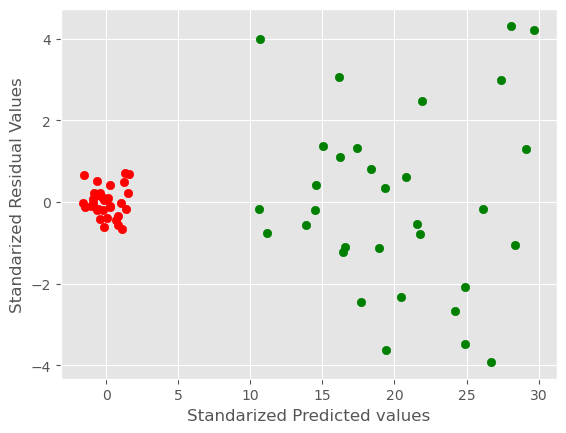

In [53]:
plt.scatter(mlr_model_3.fittedvalues,mlr_model_3.resid,c='r')
plt.scatter(mlr_model_2.fittedvalues,mlr_model_2.resid,c='g')
plt.xlabel('Standarized Predicted values')
plt.ylabel('Standarized Residual Values')
plt.show()

# Outlier Analysis

In [54]:
sm_model=sm.regression.linear_model.OLS(y_stdndr,X_standr).fit()
influence=sm_model.get_influence()
print(influence.cooks_distance)

(array([3.72455686e-03, 1.92860268e-03, 8.66321842e-02, 1.84819089e-03,
       5.91875282e-03, 5.34428584e-02, 2.32436551e-04, 3.92574705e-02,
       3.13064898e-01, 7.40125781e-03, 1.22898223e-02, 3.32102466e-03,
       3.07037773e-03, 4.64335877e-03, 4.34356461e-03, 3.16816252e-04,
       1.65015623e-01, 7.74138158e-02, 3.26021250e-02, 8.79064382e-02,
       4.49099487e-02, 6.63485194e-03, 1.98434289e-02, 4.46768207e-03,
       2.95888998e-02, 4.08254578e-03, 1.13323447e-03, 1.86684944e-01,
       2.98474877e-01, 1.59075104e-03, 6.50250423e-03, 7.99975113e-02]), array([1.        , 1.        , 0.99933938, 1.        , 0.99999998,
       0.99989026, 1.        , 0.9999661 , 0.95341705, 0.99999995,
       0.99999964, 1.        , 1.        , 0.99999999, 0.99999999,
       1.        , 0.99365935, 0.99956251, 0.99998342, 0.99930329,
       0.99994329, 0.99999997, 0.9999976 , 0.99999999, 0.99998861,
       1.        , 1.        , 0.99046356, 0.95936686, 1.        ,
       0.99999997, 0.999506

In [55]:
influence_list=influence.cooks_distance[0]
print(len(influence_list))

32


In [56]:
influence_df=pd.DataFrame(influence_list,columns=['influence'])
influence_df.index=X_standr.index
cooks_df=X_standr.merge(influence_df,left_index=True,right_index=True)
cooks_df

,const,drat,wt,qsec,vs,am,gear,carb,influence
0,1.0,0.567514,-0.610400,-0.777165,-0.868028,1.189901,0.423554,0.735203,0.003725
1,1.0,0.567514,-0.349785,-0.463781,-0.868028,1.189901,0.423554,0.735203,0.001929
2,1.0,0.474000,-0.917005,0.426007,1.116036,1.189901,0.423554,-1.122152,0.086632
3,1.0,-0.966118,-0.002300,0.890487,1.116036,-0.814143,-0.931819,-1.122152,0.001848
4,1.0,-0.835198,0.227654,-0.463781,-0.868028,-0.814143,-0.931819,-0.503034,0.005919
5,1.0,-1.564608,0.248095,1.326987,1.116036,-0.814143,-0.931819,-1.122152,0.053443
6,1.0,-0.722981,0.360516,-1.124126,-0.868028,-0.814143,-0.931819,0.735203,0.000232
7,1.0,0.174754,-0.027850,1.203871,1.116036,-0.814143,0.423554,-0.503034,0.039257
8,1.0,0.604919,-0.068731,2.826755,1.116036,-0.814143,0.423554,-0.503034,0.313065
9,1.0,0.604919,0.227654,0.252526,1.116036,-0.814143,0.423554,0.735203,0.007401


In [57]:
# Setting the Threshold and getting the outliers
original_length=len(X_standr)
cooks_threshold=4/original_length
print(cooks_threshold)

0.125


In [58]:
cooks_outliers=cooks_df[cooks_df['influence']>cooks_threshold]
cooks_outliers.sort_values(by=['influence'])
print(cooks_outliers)
print('Removed:',len(cooks_outliers))
print(f'This is {cooks_threshold*100}% of our dataset')


    const      drat        wt      qsec        vs        am      gear  \
8     1.0  0.604919 -0.068731  2.826755  1.116036 -0.814143  0.423554   
16    1.0 -0.685575  2.174596 -0.239935 -0.868028 -0.814143 -0.931819   
27    1.0  0.324377 -1.741772 -0.530935  1.116036  1.189901  1.778928   
28    1.0  1.166004 -0.048290 -1.874010 -0.868028  1.189901  1.778928   

        carb  influence  
8  -0.503034   0.313065  
16  0.735203   0.165016  
27 -0.503034   0.186685  
28  0.735203   0.298475  
Removed: 4
This is 12.5% of our dataset


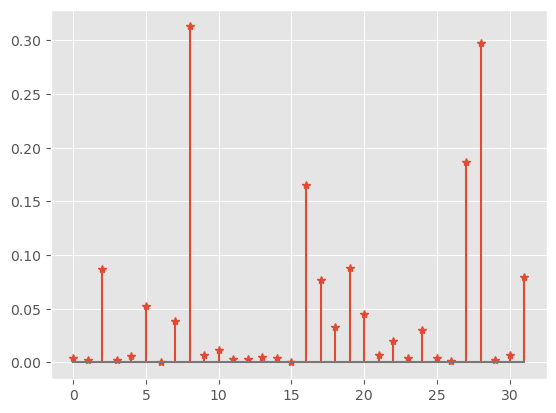

In [59]:
plt.stem(np.arange(len(X_standr)),np.round(influence_list,3),markerfmt='*')
plt.show()

In [60]:
X_standr.shape

(32, 8)

In [61]:
leverage=3*((8+1)/32)
leverage

0.84375

 # Levarage Value/Influencing Points

In [62]:
k=X_standr.shape[1]
n=X_standr.shape[0]
leverage_cutoff=3*((k+1)/n)
print('Number of variables:',k,'and number of Observations:',n)
print('Cutoff for leverage value:',round(leverage_cutoff,3))

Number of variables: 8 and number of Observations: 32
Cutoff for leverage value: 0.844


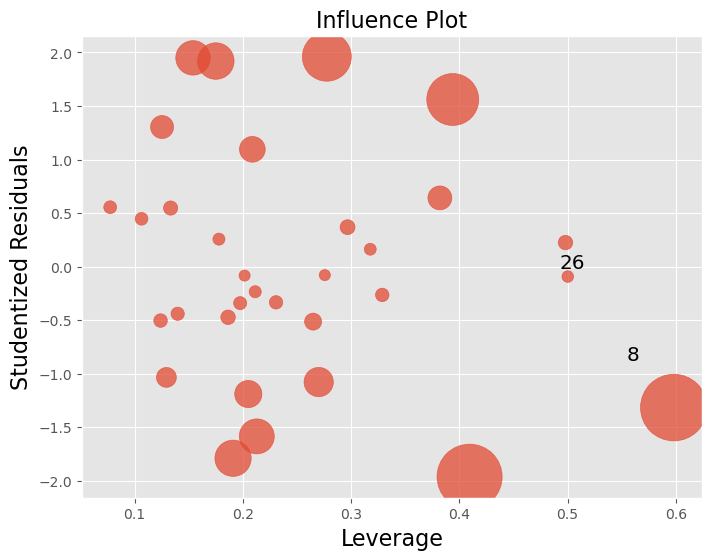

In [63]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax = plt.subplots(figsize=(8,6))
influence_plot(mlr_model_3,ax=ax)
plt.show()

In [64]:
X_standr_out=X_standr.drop(X_standr.index[[16,8,26,27]],axis=0).reset_index()

                                                                        

In [65]:
X_standr_out=X_standr_out.drop(['index'],axis=1)
print(len(X_standr_out))

28


In [66]:
y_stdndr_out=y_stdndr.drop(y_stdndr.index[[16,8,26,27]],axis=0).reset_index()
y_stdndr_out=y_stdndr_out.drop(['index'],axis=1)
print(len(y_stdndr_out))

28


In [67]:
X_standr_out.shape,y_stdndr_out.shape

((28, 8), (28, 1))

In [68]:
mlr_model_4=sm.OLS(y_stdndr_out,X_standr_out).fit()
print(mlr_model_4.rsquared)
print(mlr_model_4.rsquared_adj)

0.8870420217273226
0.8475067293318855


In [69]:
mlr_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.848   
Dependent Variable: mpg              AIC:                32.2498 
Date:               2024-07-18 09:58 BIC:                42.9074 
No. Observations:   28               Log-Likelihood:     -8.1249 
Df Model:           7                F-statistic:        22.44   
Df Residuals:       20               Prob (F-statistic): 3.66e-08
R-squared:          0.887            Scale:              0.14645 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     -0.0020     0.0767   -0.0254   0.9800   -0.1620    0.1581
drat       0.1818     0.1418    1.2826   0.2143   -0.1139    0.4776
wt        -0.6277     0.1767   -3.5530   0.0020   -0.9962   -0.2592
qsec       0.6340     0.2164    2.9297   0.0083    0.1826    1.0854
vs        -0.3227     0.2134   -1.5122   0.1461   -0.7679    0.1224
am         0.0773     0.1680    0.4601   0.6504   -0.2731    0.4277
gear       0.1700     0.2111    0.8055   0.4300   -0.2703    0.6104
carb      -0.1148     0.1607   -0.7139   0.4836   -0.4501    0.2206
-----------------------------------------------------------------
Omnibus:              0.530        Durbin-Watson:           2.082
Prob(Omnibus):        0.767        Jarque-Bera (JB):        0.634
Skew:                 0.261        Prob(JB):                0.728
Kurtosis:             2.480        Condition No.:           8    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

# Data Transformation for Testing Data

In [70]:
test_X=test_X.drop(['cyl','disp','hp'],axis=1)

In [71]:
test_X.shape

(7, 8)

In [72]:
test_X=standarized_values(test_X)
test_X=test_X.drop(['const'],axis=1)

In [73]:
test_X=sm.add_constant(test_X)
test_X

,const,drat,wt,qsec,vs,am,gear,carb
6,1.0,-0.987839,1.481688,-1.108091,-1.069045,-1.069045,-0.952661,0.826033
26,1.0,0.854114,-0.555633,-0.632631,-1.069045,0.801784,1.270215,-0.225282
25,1.0,0.325685,-0.847696,0.583663,0.801784,0.801784,0.158777,-0.750939
3,1.0,-1.184112,0.975919,0.882208,0.801784,-1.069045,-0.952661,-0.750939
18,1.0,1.609012,-1.303600,0.373576,0.801784,0.801784,0.158777,-0.225282
29,1.0,-0.368822,0.341928,-1.296064,-1.069045,0.801784,1.270215,1.877348
20,1.0,-0.248038,-0.092605,1.197339,0.801784,-1.069045,-0.952661,-0.750939


In [74]:
test_y=standarized_values(test_y)
test_y.shape


(7,)

# Prediction on Testing Data

In [75]:
y_pred=mlr_model_4.predict(test_X)
y_pred

6    -1.808574
26    0.749843
25    0.875804
3    -0.687724
18    1.201829
29   -0.697843
20    0.353006
dtype: float64

In [76]:
# Actual Value amd the Predicted Value
reg_model_diff=pd.DataFrame({'Actual Value':test_y,'predicted_value':y_pred,'Diffrence':test_y-y_pred})
reg_model_diff

,Actual Value,predicted_value,Diffrence
6,-1.606707,-1.808574,0.201867
26,0.568323,0.749843,-0.181521
25,0.809993,0.875804,-0.065812
3,-0.286817,-0.687724,0.400906
18,1.386283,1.201829,0.184454
29,-0.602847,-0.697843,0.094996
20,-0.268227,0.353006,-0.621233


In [77]:
sum(reg_model_diff['Diffrence']**2)

0.6677349711574474

# Evaluation Metrices

In [78]:
mse=(test_y-y_pred)**2
print(f"MSE: {mse.mean(): 0.2f} (+/- {mse.std():0.2f})")

mae=np.abs(test_y-y_pred)
print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

rmse=np.sqrt(mse.mean())
print(f"RMSE: {rmse:0.2f}")


# R^2 coefficient of determination

SE_line=sum((test_y-y_pred)**2)
SE_mean=sum((test_y-test_y.mean())**2)
r2=1-(SE_line/SE_mean)
print(f"R^2 coefficient of determination: {r2:0.2f}%")

MSE:  0.10 (+/- 0.14)
MAE: 0.25 (+/- 0.20)
RMSE: 0.31
R^2 coefficient of determination: 0.89%


# Model fitting using Scikit-learn Library

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

LR_model=LinearRegression()
LR_model.fit(X=X_standr_out, y=y_stdndr_out)
print(f'R2_score for training: {LR_model.score (X=X_standr_out, y=y_stdndr_out)}')

mse=mean_squared_error(test_y, y_pred)
print(f'MSE: {mse}')

RMSE=np.sqrt(mean_squared_error(test_y, y_pred))
print(f'RMSE: {RMSE}')

R_score=r2_score(test_y, y_pred)
print(f'R2_score of testing: {R_score}')


R2_score for training: 0.8870420217273226
MSE: 0.09539071016534963
RMSE: 0.3088538653883898
R2_score of testing: 0.8887108381404254


# 17th July

# Lasso Regressor

In [80]:
 #Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [81]:
dataset=fetch_california_housing()
X=dataset['data']
y=dataset['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=15)
                            

In [82]:
dataset


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [83]:
# Linear regression
LR=LinearRegression()
LR.fit(X_train,y_train)
train_score_LR=LR.score(X_train,y_train)
print('The train score for Linear model is {}'.format(train_score_LR))

The train score for Linear model is 0.6090156808313738


In [84]:
#Lasso repression model
print('\n.....................Lasso Model.................................\n')
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
train_score_ls=lasso.score(X_train,y_train) 
print('The train score for lasso model is {}'.format(train_score_ls))



.....................Lasso Model.................................

The train score for lasso model is 0.5488267992849574


In [85]:
#Ridge Regressor
#Ridge Regression Model
print('Ridge Model...........................................')
ridgeReg=Ridge(alpha=0.1)
ridgeReg.fit(X_train,y_train)
train_score_ridge=ridgeReg.score(X_train, y_train)
print('\nRidge Model........................................\n')
print('The train score for ridge model {}'.format(train_score_ridge))

Ridge Model...........................................

Ridge Model........................................

The train score for ridge model 0.6090156804624769


In [86]:
enet_model=ElasticNet(alpha=0.1).fit(X_train,y_train)
train_enet_score=(enet_model.score(X_train,y_train))
print(train_enet_score)

0.5797162482125511


In [87]:
#Testing a model on testing data set
LR_test_score=LR.score (X_test,y_test)
lasso_test_score=lasso.score(X_test,y_test)
Ridge_test_score=ridgeReg.score(X_test,y_test)
enet_test_score=enet_model.score(X_test,y_test)
result=pd.DataFrame ({'LR test score': LR_test_score,
                      'Lasso test score': lasso_test_score, 
                      'Ridge test score': Ridge_test_score,
                      'enet test score': enet_test_score}, 
                    index=['Train Score','Test score'])
print(result)

             LR test score  Lasso test score  Ridge test score  \
Train Score       0.594579          0.523638          0.594578   
Test score        0.594579          0.523638          0.594578   

             enet test score  
Train Score         0.557387  
Test score          0.557387  


In [88]:
#Testing a model on testing data set
LR_test_score=LR.score(X_test,y_test)
lasso_test_score=lasso.score(X_test,y_test)
Ridge_test_score=ridgeReg.score(X_test,y_test)
enet_test_score=enet_model.score(X_test,y_test)
result=pd.DataFrame({'LR score': [train_score_LR,LR_test_score],
                      ' Lasso score': [train_score_ls,lasso_test_score], 
                      'Ridge score': [train_score_ridge,Ridge_test_score],
                      'Enet score': [train_enet_score,enet_test_score]}, 
                       index=['Train score','Test score'])
print(result)




             LR score   Lasso score  Ridge score  Enet score
Train score  0.609016      0.548827     0.609016    0.579716
Test score   0.594579      0.523638     0.594578    0.557387


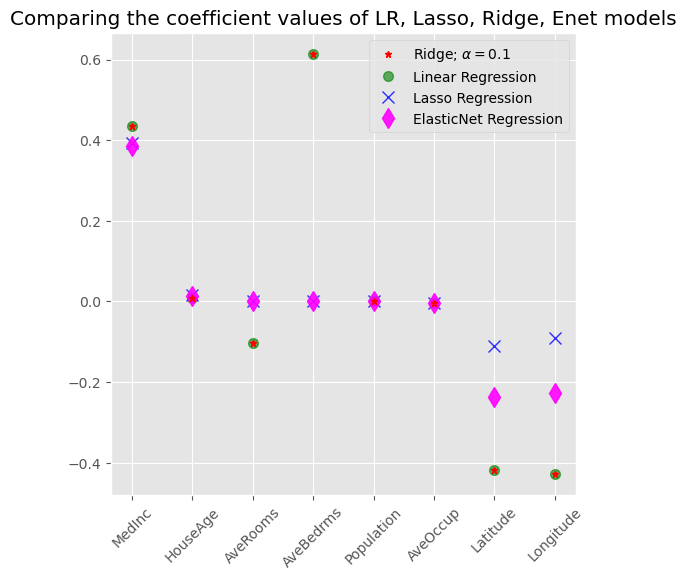

In [89]:
#Lets plot the coefficients for both the Linear and ridge models.
plt.figure(figsize=(6,6))
plt.plot(dataset.feature_names, ridgeReg.coef_,alpha=1, linestyle='none',
         marker='*', markersize=5,color='red', label=r'Ridge; $\alpha= 0.1$', zorder=7)

plt.plot(dataset.feature_names, LR.coef_, alpha=0.6, linestyle='none',
         marker='o', markersize=7,color='green', label='Linear Regression')

plt.plot(dataset.feature_names, lasso.coef_, alpha=0.8, linestyle='none',
         marker='x', markersize=9, color='blue', label='Lasso Regression')

plt.plot(dataset.feature_names, enet_model.coef_,alpha=0.9, linestyle='none',
         marker='d', markersize=10,color="magenta", label='ElasticNet Regression') 

plt.xticks (rotation=45 )
plt.title('Comparing the coefficient values of LR, Lasso, Ridge, Enet models')
plt.legend()
plt.show()

# Using Cross Validation

In [90]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

# Lasso Cross Validation

In [91]:
#Using the Linear CV model
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
#Lasso Cross validation
lasso_cv=LassoCV(alphas=[0.0001, 0.0002,0.0009,0.001,0.002,0.003,0.0035,0.0003,0.01, 0.1, 1, 10], random_state=10).fit(X_train,y_train)
#score
print(f'tarining score: {lasso_cv.score(X_train, y_train)}')
print(lasso_cv.alpha_)



tarining score: 0.6088668691740275
0.002


# Ridge Cross validation

In [92]:
#Using the Linear CV model
from sklearn.linear_model import RidgeCV
#Ridge Cross validation
ridge_cv=RidgeCV (alphas=[0.0001,0.002, 0.001,0.01,0.02, 0.1, 1, 10,10.5,11,12,15,17,19,50, 100, 150]).fit(X_train, y_train)
#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train))) 
print(ridge_cv.alpha_)


The train score for ridge model is 0.6087460107958623
100.0


# 18th July

In [93]:
np.log(4)

1.3862943611198906

In [94]:
alpha=np.logspace (-4,-1,10)
np.empty_like (alpha)
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [97]:
alphas=np.logspace (-4, -1, 10)
scores= np.empty_like(alphas)
for i,a in enumerate (alphas):
    lasso=Lasso()
    lasso.set_params(alpha=a) 
    lasso.fit(X_train, y_train)
    scores[i]=lasso.score(X_test,y_test)
    


In [98]:
print(scores)

[0.59454473 0.59450471 0.59441549 0.59420946 0.59370145 0.59230927
 0.58792785 0.57907547 0.5666033  0.52363775]


0.03432308935225828


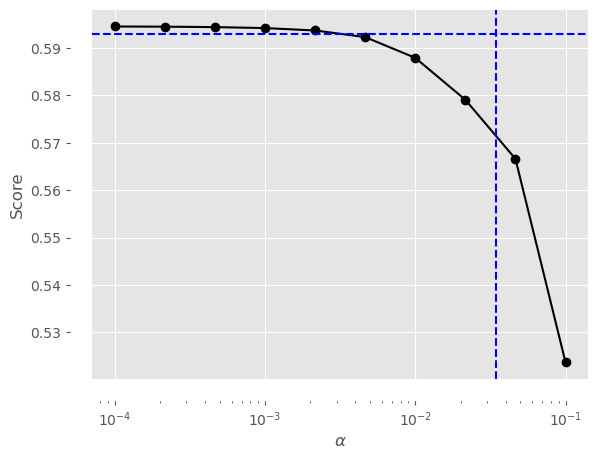

In [104]:
lassocv=LassoCV(random_state=0)
lassocv.fit(X_train,y_train)
lassocv_score=lassocv.score(X_train,y_train)
lassocv_alpha=lassocv.alpha_
print(lassocv_alpha)
#print('CV', Lassocv.coef_)
plt.plot(alphas, scores, '-ko')
plt.axhline (lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

# Elastic Net Regressor

In [105]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas=np.logspace(-3,1,num=30)
model=make_pipeline(StandardScaler(),RidgeCV(alphas=alphas))
cv_results=cross_validate(model,X_train,y_train,return_estimator=True,n_jobs=2)
print(cv_results)

{'fit_time': array([0.10859084, 0.10859084, 0.11206269, 0.09639263, 0.02323246]), 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.01563835]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-

In [106]:
score=cv_results['test_score']
print(score)
print(f'R2 score:{score.mean():.3f} ± {score.std():.3f}')

[0.63949534 0.60571284 0.61115815 0.56191319 0.60883357]
R2 score:0.605 ± 0.025


In [112]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas=np.logspace(-3,1,num=30)
model=make_pipeline(StandardScaler(),ElasticNetCV(alphas=alphas))
cv_results=cross_validate(model,X_train,y_train,return_estimator=True,n_jobs=2)
print(cv_results)

{'fit_time': array([0.17176938, 0.17176938, 0.1907692 , 0.1751492 , 0.16740632]), 'score_time': array([0., 0., 0., 0., 0.]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,


In [114]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo
#Fetch DataSet
wine_quality=fetch_ucirepo(id=186)

In [5]:
# Data (as pandas DataFrames)
X=wine_quality.data.features
y=wine_quality.data.targets
print(y)
print(X)

      quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041 

In [10]:
# Metadata
print(wine_quality.metadata)
# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc